**Resultados**

Métricas L1, IoU y porcentaje de pérdida de área.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

**Funciones**

In [2]:
# Funcion para obtener mejor modelo con diferentes criterios
# L1 minimo, IoU maximo y minimo del valor absoluto de porcentaje de perdida
# input: dataframe de resultados concatenados

def mejor_modelo(problema):
    a = problema.loc[problema['error_L1'].idxmin()].to_frame().T
    a.index = ['L1 minimo'] 
    b = problema.loc[problema['IoU'].idxmax()].to_frame().T
    b.index = ['IoU maximo'] 
    c = problema.loc[abs(problema['area_loss(%)']).idxmin()].to_frame().T
    c.index = ['abs(%p.a.) minimo'] 
    mejor_mod = pd.concat([a,b,c], ignore_index=False)
    return mejor_mod

In [ ]:
# Funcion para grafico 1
# Comparacion de todos los modelos por problema

def grafico1(datos):
    fig, ax = plt.subplots(3, 1, figsize=(8, 11), dpi=150)  # 3 filas, 1 columna

    # Grafico 1
    sns.lineplot(data=datos, x='num_iter', y='error_L1', ax=ax[0], hue='Caso', style='Caso', markers=False, dashes=False, palette='Set1')
    ax[0].set_xticks(np.linspace(datos['num_iter'].min()+50000, datos['num_iter'].max(), num=20))
    ax[0].set_title('Error $L_1$ en $t=1$ vs Número de Iteraciones', fontsize=14)
    ax[0].set_xlabel('Número de Iteraciones', fontsize=11)
    ax[0].set_xlim(50000, 2000000)
    ax[0].set_ylabel('Error $L_1$', fontsize=11)
    ax[0].grid(linestyle='--', linewidth=0.5)
    ax[0].set_yscale('log')
    ax[0].legend(title="", fontsize=9) 

    # Grafico 2
    sns.lineplot(data=datos, x='num_iter', y='IoU', ax=ax[1], hue='Caso', style='Caso', markers=False, dashes=False, palette='Set1')
    ax[1].set_xticks(np.linspace(datos['num_iter'].min()+50000, datos['num_iter'].max(), num=20))
    ax[1].set_title('IoU en $t=1$ vs Número de Iteraciones', fontsize=14)
    ax[1].set_xlabel('Número de Iteraciones', fontsize=11)
    ax[1].set_xlim(50000, 2000000)
    ax[1].set_ylabel('IoU', fontsize=11)
    ax[1].grid(linestyle='--', linewidth=0.5)
    ax[1].legend(title="", fontsize=11) 

    # Grafico 3
    sns.lineplot(data=datos, x='num_iter', y='area_loss(%)', ax=ax[2], hue='Caso', style='Caso', markers=False, dashes=False, palette='Set1')
    ax[2].set_xticks(np.linspace(datos['num_iter'].min()+50000, datos['num_iter'].max(), num=20))
    ax[2].set_title('Pérdida de Área (%) en $t=1$ vs Número de Iteraciones', fontsize=14)
    ax[2].set_xlabel('Número de Iteraciones', fontsize=11)
    ax[2].set_xlim(50000, 2000000)
    ax[2].set_ylabel('Pérdida de área (%)', fontsize=11)
    ax[2].grid(linestyle='--', linewidth=0.5)
    ax[2].legend(title="", fontsize=11) 

    # Configuraciones
    plt.tight_layout()
    plt.show()

**Rotación del Círculo**

In [4]:
# Malla 100x100
# Circulo 5c200n sigmoid
c_100_5c_s = pd.read_csv('circulo/r_circulo_100x100_5c_200n_sigmoid/resultados.csv')
c_100_5c_s['Caso'] = '5c200n_sigmoid'
# Circulo 5c200n tanh
c_100_5c_t = pd.read_csv('circulo/r_circulo_100x100_5c_200n_tanh/resultados.csv')
c_100_5c_t['Caso'] = '5c200n_tanh'
# Circulo 3c100n sigmoid
c_100_3c_s = pd.read_csv('circulo/r_circulo_100x100_3c_100n_sigmoid/resultados.csv')
c_100_3c_s['Caso'] = '3c100n_sigmoid'
# Circulo 3c100n tanh
c_100_3c_t = pd.read_csv('circulo/r_circulo_100x100_3c_100n_tanh/resultados.csv')
c_100_3c_t['Caso'] = '3c100n_tanh'

# Concat
circulo100 = pd.concat([c_100_5c_s, c_100_5c_t, c_100_3c_s, c_100_3c_t], ignore_index=True)
circulo100['Malla'] = 100
circulo100

,num_iter,area,area_loss(%),error_L1,orden_L1,IoU,orden_IoU,tiempo_horas,tiempo_minutos,tiempo_segundos,Caso,Malla
0,50000,0.084908,-20.120560,0.015090,0.000000,0.832464,0.000000,0,7,58.370175,5c200n_sigmoid,100
1,100000,0.073133,-3.461721,0.003605,-2.065529,0.953875,0.196413,0,15,58.357589,5c200n_sigmoid,100
2,150000,0.075942,-7.436316,0.005576,1.075922,0.930773,-0.060468,0,23,57.556878,5c200n_sigmoid,100
3,200000,0.073259,-3.640310,0.002729,-2.483544,0.964918,0.125234,0,31,56.891748,5c200n_sigmoid,100
4,250000,0.073792,-4.394319,0.003295,0.843839,0.957961,-0.032428,0,39,55.500555,5c200n_sigmoid,100
...,...,...,...,...,...,...,...,...,...,...,...,...
155,1800000,0.071610,-1.307636,0.001101,-19.311132,0.985540,0.367868,2,35,44.042704,3c100n_tanh,100
156,1850000,0.071031,-0.488485,0.000706,-16.212332,0.990632,0.188094,2,40,7.461038,3c100n_tanh,100
157,1900000,0.071907,-1.727438,0.001311,23.211614,0.982848,-0.295820,2,44,28.390152,3c100n_tanh,100
158,1950000,0.070997,-0.439707,0.000852,-16.611909,0.988805,0.232626,2,49,23.073723,3c100n_tanh,100


In [5]:
# Malla 80x80
# Circulo 5c200n sigmoid
c_80_5c_s = pd.read_csv('circulo/r_circulo_80x80_5c_200n_sigmoid/resultados.csv')
c_80_5c_s['Caso'] = '5c200n_sigmoid'
# Circulo 5c200n tanh
c_80_5c_t = pd.read_csv('circulo/r_circulo_80x80_5c_200n_tanh/resultados.csv')
c_80_5c_t['Caso'] = '5c200n_tanh'
# Circulo 3c100n sigmoid
c_80_3c_s = pd.read_csv('circulo/r_circulo_80x80_3c_100n_sigmoid/resultados.csv')
c_80_3c_s['Caso'] = '3c100n_sigmoid'
# Circulo 3c100n tanh
c_80_3c_t = pd.read_csv('circulo/r_circulo_80x80_3c_100n_tanh/resultados.csv')
c_80_3c_t['Caso'] = '3c100n_tanh'

# Concat
circulo80 = pd.concat([c_80_5c_s, c_80_5c_t, c_80_3c_s, c_80_3c_t], ignore_index=True)
circulo80['Malla'] = 80
circulo80

,num_iter,area,area_loss(%),error_L1,orden_L1,IoU,orden_IoU,tiempo_horas,tiempo_minutos,tiempo_segundos,Caso,Malla
0,50000,0.055818,21.033804,0.015776,0.000000,0.789666,0.000000,0,9,16.698829,5c200n_sigmoid,80
1,100000,0.078729,-11.379126,0.008533,-0.886551,0.897865,0.185255,0,19,11.527789,5c200n_sigmoid,80
2,150000,0.079404,-12.333910,0.009250,0.198735,0.890224,-0.021076,0,28,59.643180,5c200n_sigmoid,80
3,200000,0.073848,-4.473779,0.003354,-3.525722,0.957207,0.252176,0,38,38.081275,5c200n_sigmoid,80
4,250000,0.073708,-4.275836,0.003206,-0.202860,0.959018,0.008467,0,48,22.527513,5c200n_sigmoid,80
...,...,...,...,...,...,...,...,...,...,...,...,...
155,1800000,0.071904,-1.723505,0.001292,-0.798601,0.983161,0.014823,2,51,46.844048,3c100n_tanh,80
156,1850000,0.071024,-0.477943,0.000842,-15.634935,0.988884,0.211827,2,56,9.497447,3c100n_tanh,80
157,1900000,0.071113,-0.604922,0.000835,-0.279493,0.988922,0.001466,3,2,1.193099,3c100n_tanh,80
158,1950000,0.071954,-1.793524,0.001344,18.312970,0.982354,-0.256550,3,6,12.196398,3c100n_tanh,80


In [6]:
# Mejor modelo para el circulo
mejor_modelo(pd.concat([circulo100, circulo80], ignore_index=True))

,num_iter,area,area_loss(%),error_L1,orden_L1,IoU,orden_IoU,tiempo_horas,tiempo_minutos,tiempo_segundos,Caso,Malla
L1 minimo,1700000,0.070602,0.119033,0.000099,-41.37817,0.998701,0.107205,4,31,26.240483,5c200n_sigmoid,100
IoU maximo,1700000,0.070602,0.119033,0.000099,-41.37817,0.998701,0.107205,4,31,26.240483,5c200n_sigmoid,100
abs(%p.a.) minimo,750000,0.070683,0.003383,0.000151,-16.031967,0.99803,0.060252,1,35,43.437261,5c200n_tanh,80


In [ ]:
# Mejor modelo para el circulo - solo 100x100
mejor_modelo(circulo100)

,num_iter,area,area_loss(%),error_L1,orden_L1,IoU,orden_IoU,tiempo_horas,tiempo_minutos,tiempo_segundos,Caso,Malla
L1 minimo,1700000,0.070602,0.119033,0.000099,-41.37817,0.998701,0.107205,4,31,26.240483,5c200n_sigmoid,100
IoU maximo,1700000,0.070602,0.119033,0.000099,-41.37817,0.998701,0.107205,4,31,26.240483,5c200n_sigmoid,100
abs(%p.a.) minimo,1550000,0.070689,-0.004957,0.000554,-15.632934,0.992692,0.152034,4,7,26.757014,5c200n_sigmoid,100


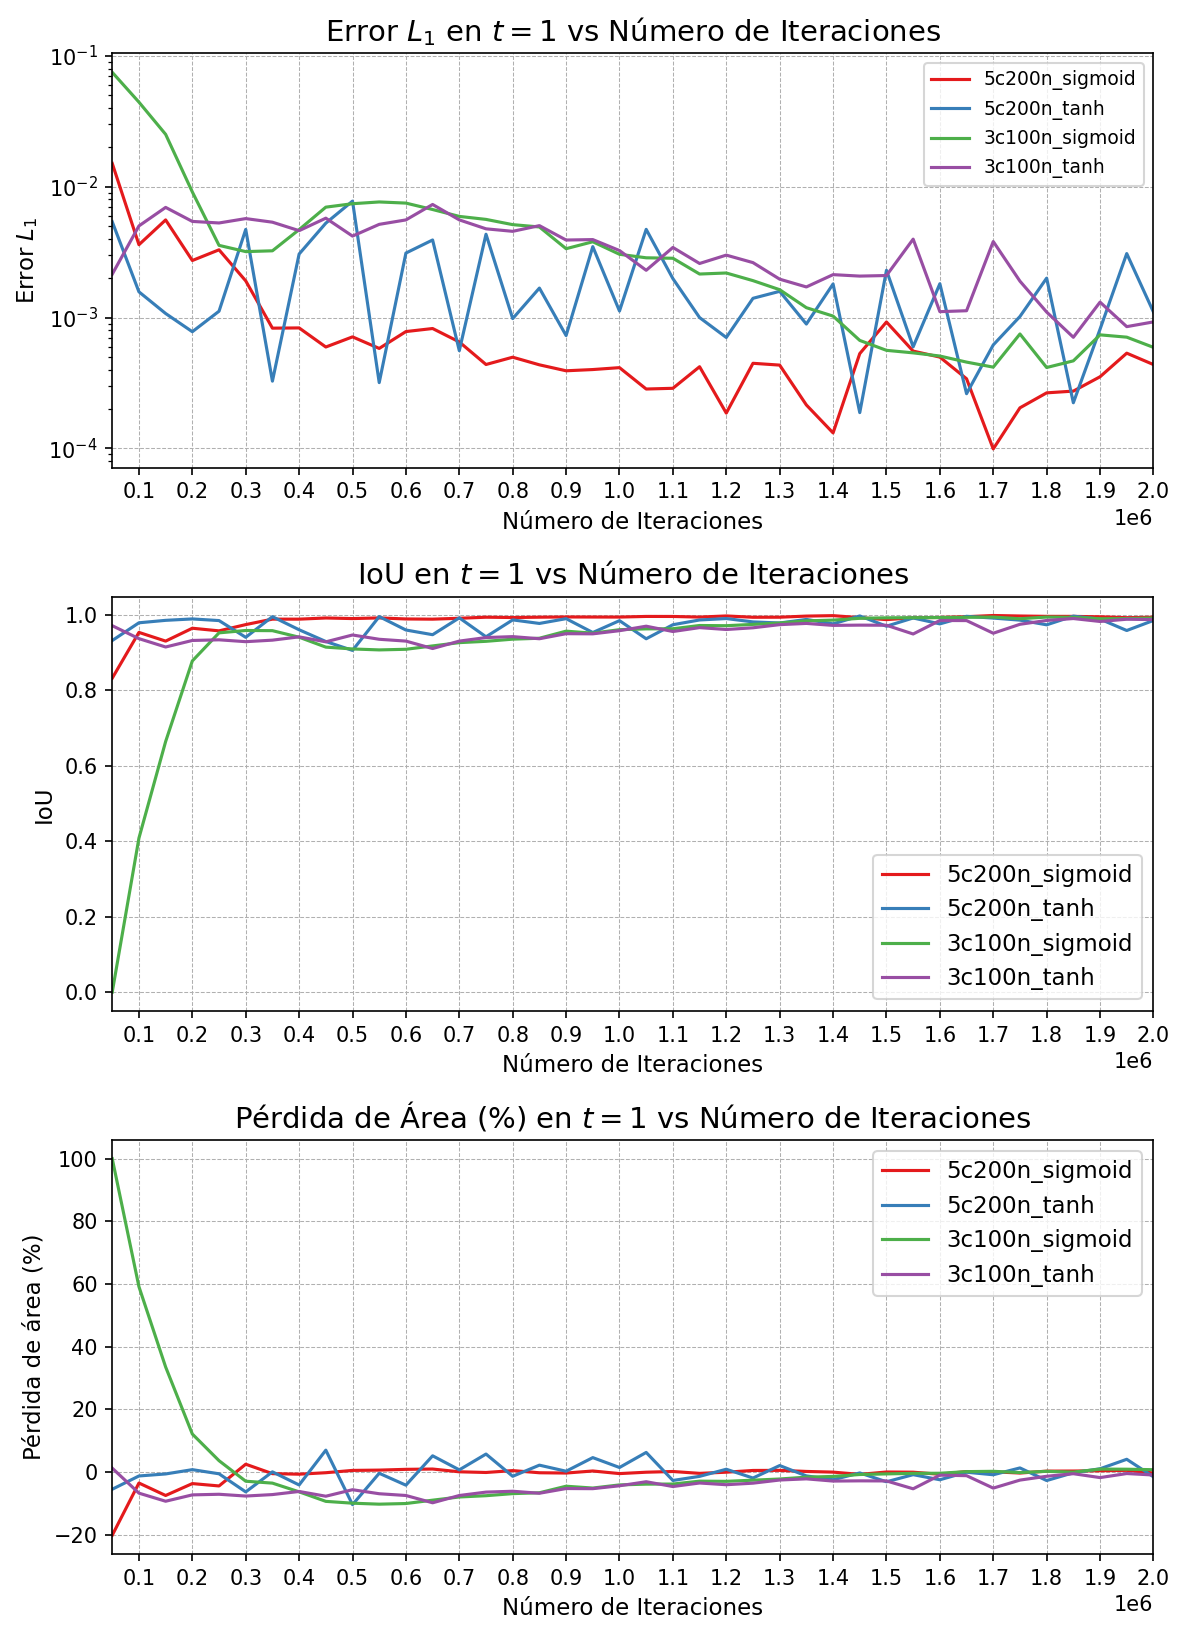

In [8]:
# Grafico Rotacion del Circulo Malla 100x100
grafico1(datos=circulo100)

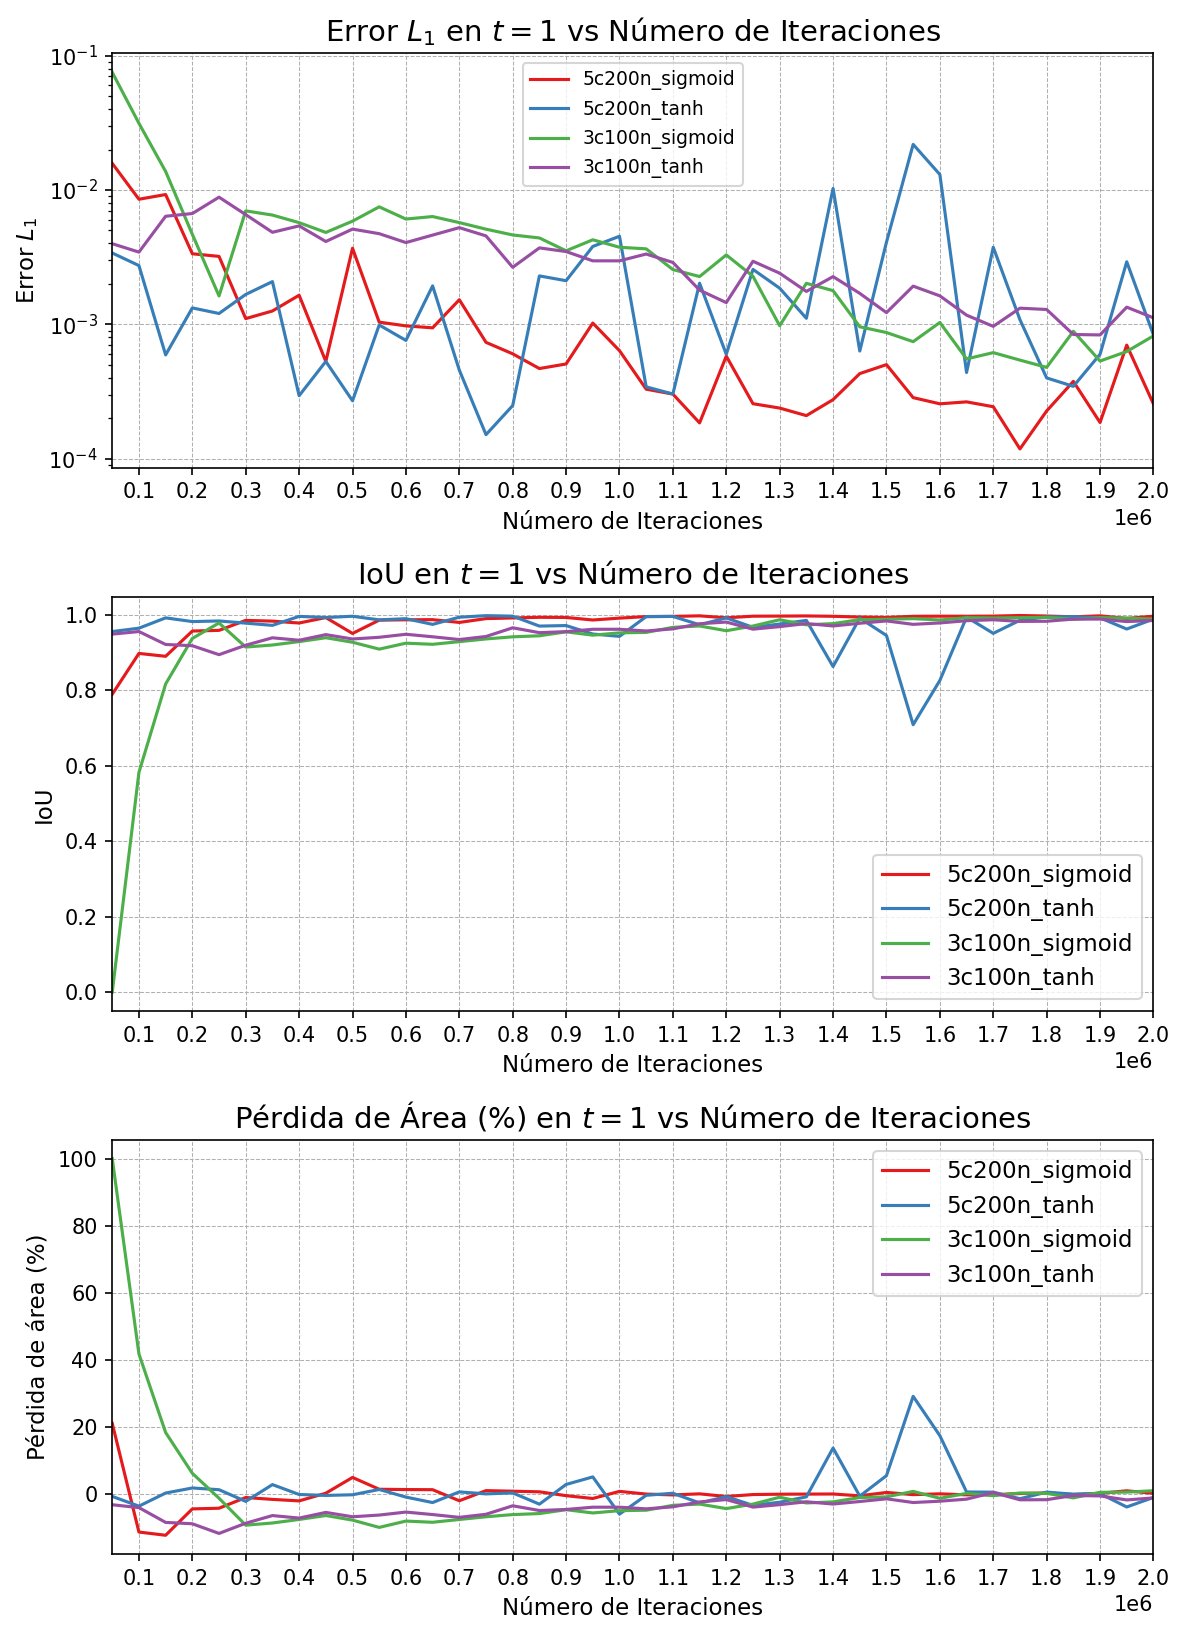

In [9]:
# Grafico Rotacion del Circulo Malla 80x80
grafico1(datos=circulo80)

**Rotación del Rectángulo**

In [10]:
# Malla 100x100
# Rectangulo 5c200n sigmoid
r_100_5c_s = pd.read_csv('rectangulo/r_rectangulo_100x100_5c_200n_sigmoid/resultados.csv')
r_100_5c_s['Caso'] = '5c200n_sigmoid'
# Rectangulo 5c200n tanh
r_100_5c_t = pd.read_csv('rectangulo/r_rectangulo_100x100_5c_200n_tanh/resultados.csv')
r_100_5c_t['Caso'] = '5c200n_tanh'
# Rectangulo 3c100n sigmoid
r_100_3c_s = pd.read_csv('rectangulo/r_rectangulo_100x100_3c_100n_sigmoid/resultados.csv')
r_100_3c_s['Caso'] = '3c100n_sigmoid'
# Rectangulo 3c100n tanh
r_100_3c_t = pd.read_csv('rectangulo/r_rectangulo_100x100_3c_100n_tanh/resultados.csv')
r_100_3c_t['Caso'] = '3c100n_tanh'

# Concat
rectangulo100 = pd.concat([r_100_5c_s, r_100_5c_t, r_100_3c_s, r_100_3c_t], ignore_index=True)
rectangulo100['Malla'] = 100
rectangulo100

,num_iter,area,area_loss(%),error_L1,orden_L1,IoU,orden_IoU,tiempo_horas,tiempo_minutos,tiempo_segundos,Caso,Malla
0,50000,0.086429,27.976235,0.051333,0.000000,0.430938,0.000000,0,7,59.930327,5c200n_sigmoid,100
1,100000,0.119102,0.747995,0.037283,-0.461369,0.600821,0.479453,0,15,59.383530,5c200n_sigmoid,100
2,150000,0.105794,11.838527,0.025133,-0.972599,0.697840,0.369188,0,23,59.038539,5c200n_sigmoid,100
3,200000,0.112773,6.022157,0.019529,-0.876911,0.763417,0.312202,0,31,59.605384,5c200n_sigmoid,100
4,250000,0.128908,-7.423230,0.014339,-1.384461,0.831251,0.381493,0,39,59.723001,5c200n_sigmoid,100
...,...,...,...,...,...,...,...,...,...,...,...,...
155,1800000,0.122478,-2.064724,0.004411,1.066463,0.943521,-0.043201,2,31,24.041058,3c100n_tanh,100
156,1850000,0.120583,-0.485831,0.004150,-2.226367,0.946239,0.104989,2,35,38.329191,3c100n_tanh,100
157,1900000,0.119487,0.427397,0.004087,-0.577832,0.946895,0.025968,2,39,52.192281,3c100n_tanh,100
158,1950000,0.120615,-0.512617,0.004092,0.051026,0.947113,0.008853,2,44,5.200367,3c100n_tanh,100


In [11]:
# Malla 80x80
# Rectangulo 5c200n sigmoid
r_80_5c_s = pd.read_csv('rectangulo/r_rectangulo_80x80_5c_200n_sigmoid/resultados.csv')
r_80_5c_s['Caso'] = '5c200n_sigmoid'
# Rectangulo 5c200n tanh
r_80_5c_t = pd.read_csv('rectangulo/r_rectangulo_80x80_5c_200n_tanh/resultados.csv')
r_80_5c_t['Caso'] = '5c200n_tanh'
# Rectangulo 3c100n sigmoid
r_80_3c_s = pd.read_csv('rectangulo/r_rectangulo_80x80_3c_100n_sigmoid/resultados.csv')
r_80_3c_s['Caso'] = '3c100n_sigmoid'
# Rectangulo 3c100n tanh
r_80_3c_t = pd.read_csv('rectangulo/r_rectangulo_80x80_3c_100n_tanh/resultados.csv')
r_80_3c_t['Caso'] = '3c100n_tanh'

# Concat
rectangulo80 = pd.concat([r_80_5c_s, r_80_5c_t, r_80_3c_s, r_80_3c_t], ignore_index=True)
rectangulo80['Malla'] = 80
rectangulo80

,num_iter,area,area_loss(%),error_L1,orden_L1,IoU,orden_IoU,tiempo_horas,tiempo_minutos,tiempo_segundos,Caso,Malla
0,50000,0.077673,35.272418,0.051243,0.000000,0.413884,0.000000,0,6,28.605119,5c200n_sigmoid,80
1,100000,0.107008,10.826590,0.028827,-0.829937,0.662405,0.678486,0,12,53.411333,5c200n_sigmoid,80
2,150000,0.130424,-8.686437,0.019674,-0.942168,0.776837,0.393014,0,19,25.422780,5c200n_sigmoid,80
3,200000,0.121241,-1.033879,0.012753,-1.506910,0.844100,0.288652,0,25,57.028586,5c200n_sigmoid,80
4,250000,0.103274,13.938034,0.010781,-0.753087,0.856643,0.066103,0,32,27.671531,5c200n_sigmoid,80
...,...,...,...,...,...,...,...,...,...,...,...,...
155,1800000,0.123881,-3.234320,0.005527,2.662288,0.929951,-0.177273,2,33,47.984886,3c100n_tanh,80
156,1850000,0.123449,-2.874330,0.005365,-1.087414,0.931904,0.076566,2,37,59.604814,3c100n_tanh,80
157,1900000,0.123184,-2.653368,0.005261,-0.731080,0.933173,0.051005,2,42,11.198820,3c100n_tanh,80
158,1950000,0.122028,-1.690091,0.004794,-3.579022,0.938498,0.219076,2,46,21.995291,3c100n_tanh,80


In [12]:
# Mejor modelo para el rectangulo
mejor_modelo(pd.concat([rectangulo100, rectangulo80], ignore_index=True))

,num_iter,area,area_loss(%),error_L1,orden_L1,IoU,orden_IoU,tiempo_horas,tiempo_minutos,tiempo_segundos,Caso,Malla
L1 minimo,1900000,0.120087,-0.072918,0.00027,-20.000098,0.996454,0.10649,5,4,16.172094,5c200n_sigmoid,100
IoU maximo,1900000,0.120087,-0.072918,0.00027,-20.000098,0.996454,0.10649,5,4,16.172094,5c200n_sigmoid,100
abs(%p.a.) minimo,1800000,0.120008,-0.006834,0.000319,-57.593928,0.995961,0.647453,4,42,0.679849,5c200n_tanh,100


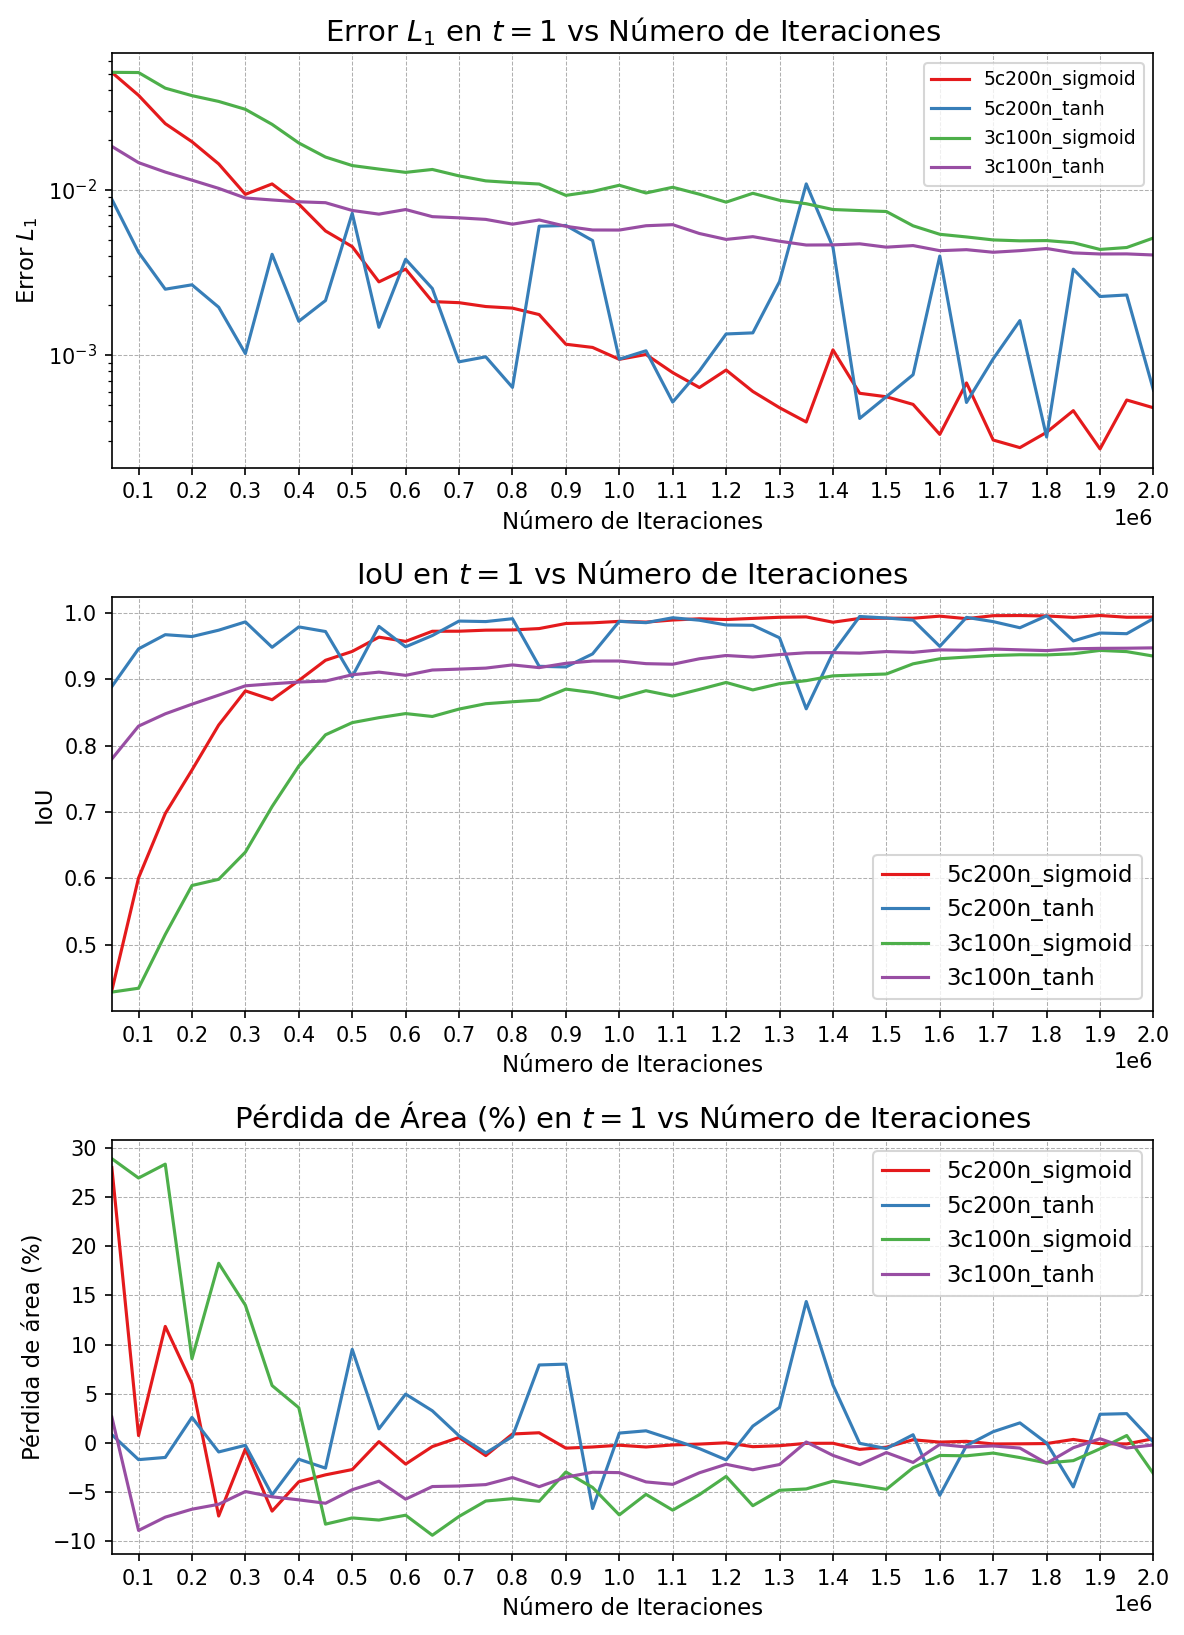

In [13]:
grafico1(datos=rectangulo100)

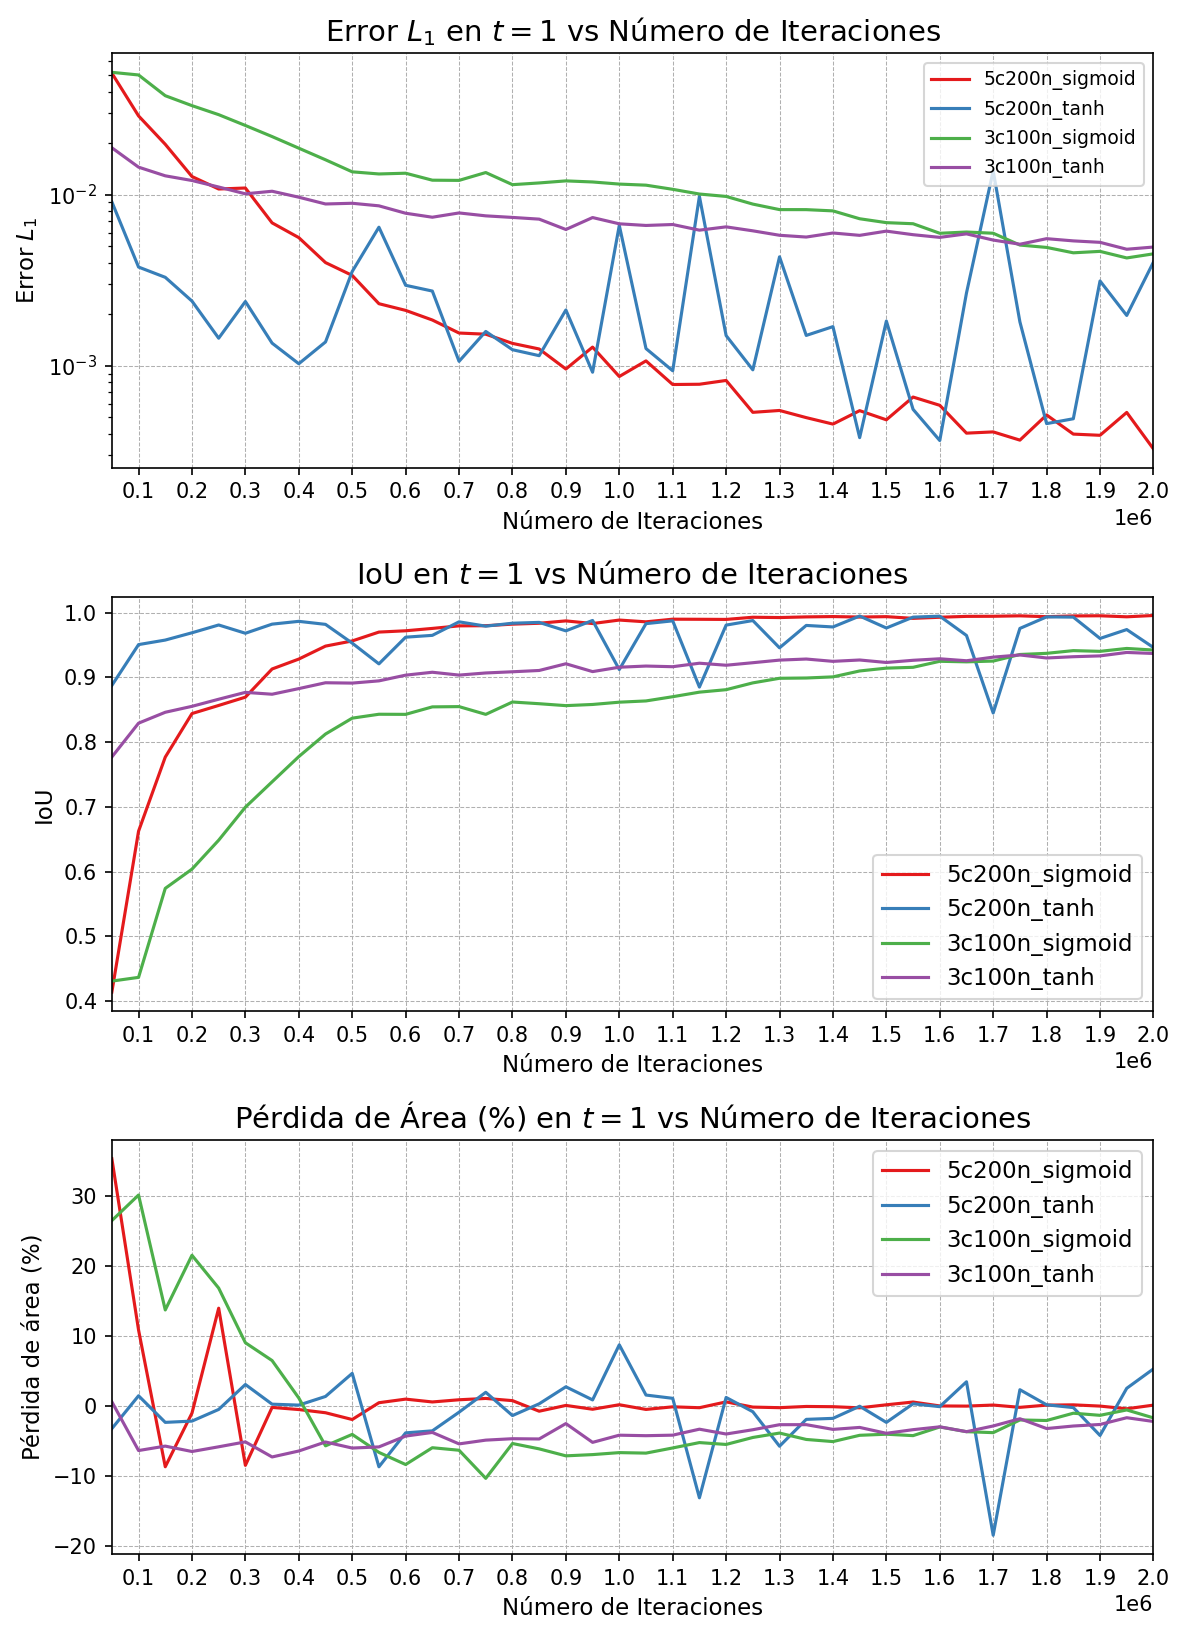

In [14]:
grafico1(datos=rectangulo80)

**Rotación del Disco de Zalesak**

In [15]:
# Malla 100x100
# Zalesak 5c200n sigmoid
z_100_5c_s = pd.read_csv('zalesak/r_zalesak_100x100_5c_200n_sigmoid/resultados.csv')
z_100_5c_s['Caso'] = '5c200n_sigmoid'
# Zalesak 5c200n tanh
z_100_5c_t = pd.read_csv('zalesak/r_zalesak_100x100_5c_200n_tanh/resultados.csv')
z_100_5c_t['Caso'] = '5c200n_tanh'
# Zalesak 3c100n sigmoid
z_100_3c_s = pd.read_csv('zalesak/r_zalesak_100x100_3c_100n_sigmoid/resultados.csv')
z_100_3c_s['Caso'] = '3c100n_sigmoid'
# Zalesak 3c100n tanh
z_100_3c_t = pd.read_csv('zalesak/r_zalesak_100x100_3c_100n_tanh/resultados.csv')
z_100_3c_t['Caso'] = '3c100n_tanh'

# Concat
zalesak100 = pd.concat([z_100_5c_s, z_100_5c_t, z_100_3c_s, z_100_3c_t], ignore_index=True)
zalesak100['Malla'] = 100
zalesak100

,num_iter,area,area_loss(%),error_L1,orden_L1,IoU,orden_IoU,tiempo_horas,tiempo_minutos,tiempo_segundos,Caso,Malla
0,50000,0.055065,-8.037553,0.023232,0.000000,0.550419,0.000000,0,7,55.530184,5c200n_sigmoid,100
1,100000,0.052657,-3.312260,0.024946,0.102665,0.516826,-0.090850,0,15,52.982539,5c200n_sigmoid,100
2,150000,0.046382,8.998945,0.010182,-2.210044,0.756910,0.940990,0,23,50.501774,5c200n_sigmoid,100
3,200000,0.049792,2.308381,0.007609,-1.012689,0.818478,0.271835,0,32,2.744772,5c200n_sigmoid,100
4,250000,0.049000,3.861657,0.007906,0.171712,0.810603,-0.043329,0,40,1.688274,5c200n_sigmoid,100
...,...,...,...,...,...,...,...,...,...,...,...,...
155,1800000,0.051667,-1.370774,0.005409,1.189476,0.869717,-0.176866,2,43,4.828933,3c100n_tanh,100
156,1850000,0.051044,-0.147881,0.005052,-2.493218,0.877047,0.306334,2,47,33.959161,3c100n_tanh,100
157,1900000,0.050933,0.069465,0.005237,1.346589,0.872782,-0.182793,2,52,7.818114,3c100n_tanh,100
158,1950000,0.050627,0.669346,0.004996,-1.812062,0.877886,0.224465,2,56,40.541551,3c100n_tanh,100


In [16]:
# Malla 80x80
# Zalesak 5c200n sigmoid
z_80_5c_s = pd.read_csv('zalesak/r_zalesak_80x80_5c_200n_sigmoid/resultados.csv')
z_80_5c_s['Caso'] = '5c200n_sigmoid'
# Zalesak 5c200n tanh
z_80_5c_t = pd.read_csv('zalesak/r_zalesak_80x80_5c_200n_tanh/resultados.csv')
z_80_5c_t['Caso'] = '5c200n_tanh'
# Zalesak 3c100n sigmoid
z_80_3c_s = pd.read_csv('zalesak/r_zalesak_80x80_3c_100n_sigmoid/resultados.csv')
z_80_3c_s['Caso'] = '3c100n_sigmoid'
# Zalesak 3c100n tanh
z_80_3c_t = pd.read_csv('zalesak/r_zalesak_80x80_3c_100n_tanh/resultados.csv')
z_80_3c_t['Caso'] = '3c100n_tanh'

# Concat
zalesak80 = pd.concat([z_80_5c_s, z_80_5c_t, z_80_3c_s, z_80_3c_t], ignore_index=True)
zalesak80['Malla'] = 80
zalesak80

,num_iter,area,area_loss(%),error_L1,orden_L1,IoU,orden_IoU,tiempo_horas,tiempo_minutos,tiempo_segundos,Caso,Malla
0,50000,0.035419,30.508912,0.034579,0.000000,0.307395,0.000000,0,6,23.013893,5c200n_sigmoid,80
1,100000,0.026180,48.635409,0.018750,-0.882979,0.513056,0.739023,0,12,46.988768,5c200n_sigmoid,80
2,150000,0.047785,6.246343,0.008973,-1.817724,0.785444,1.050308,0,19,9.116693,5c200n_sigmoid,80
3,200000,0.049793,2.306417,0.008014,-0.392713,0.809578,0.105200,0,25,38.054914,5c200n_sigmoid,80
4,250000,0.049699,2.491030,0.007537,-0.274824,0.819696,0.055663,0,32,7.274235,5c200n_sigmoid,80
...,...,...,...,...,...,...,...,...,...,...,...,...
155,1800000,0.050680,0.566347,0.006189,-1.985213,0.850956,0.285657,2,29,13.078053,3c100n_tanh,80
156,1850000,0.052389,-2.786791,0.005750,-2.688609,0.862912,0.509260,2,33,24.074244,3c100n_tanh,80
157,1900000,0.051725,-1.484466,0.005775,0.164111,0.861527,-0.060266,2,37,35.756465,3c100n_tanh,80
158,1950000,0.051510,-1.062214,0.005744,-0.210692,0.862055,0.023609,2,41,46.307149,3c100n_tanh,80


In [ ]:
# Mejor modelo para el disco de Zalesak
mejor_modelo(pd.concat([zalesak100, zalesak80], ignore_index=True))

,num_iter,area,area_loss(%),error_L1,orden_L1,IoU,orden_IoU,tiempo_horas,tiempo_minutos,tiempo_segundos,Caso,Malla
L1 minimo,1750000,0.051056,-0.172103,0.000291,-63.601977,0.99254,1.437391,3,44,13.534313,5c200n_tanh,80
IoU maximo,1750000,0.051056,-0.172103,0.000291,-63.601977,0.99254,1.437391,3,44,13.534313,5c200n_tanh,80
abs(%p.a.) minimo,1300000,0.050969,-0.000147,0.00066,-11.045557,0.982759,0.222517,2,48,37.921553,5c200n_sigmoid,80


In [ ]:
# Mejor modelo para el disco de zalesak - solo 100x100
mejor_modelo(zalesak100)

,num_iter,area,area_loss(%),error_L1,orden_L1,IoU,orden_IoU,tiempo_horas,tiempo_minutos,tiempo_segundos,Caso,Malla
L1 minimo,1700000,0.050965,0.006181,0.000374,-11.600309,0.990552,0.151315,4,23,41.672085,5c200n_tanh,100
IoU maximo,1700000,0.050965,0.006181,0.000374,-11.600309,0.990552,0.151315,4,23,41.672085,5c200n_tanh,100
abs(%p.a.) minimo,1700000,0.050965,0.006181,0.000374,-11.600309,0.990552,0.151315,4,23,41.672085,5c200n_tanh,100


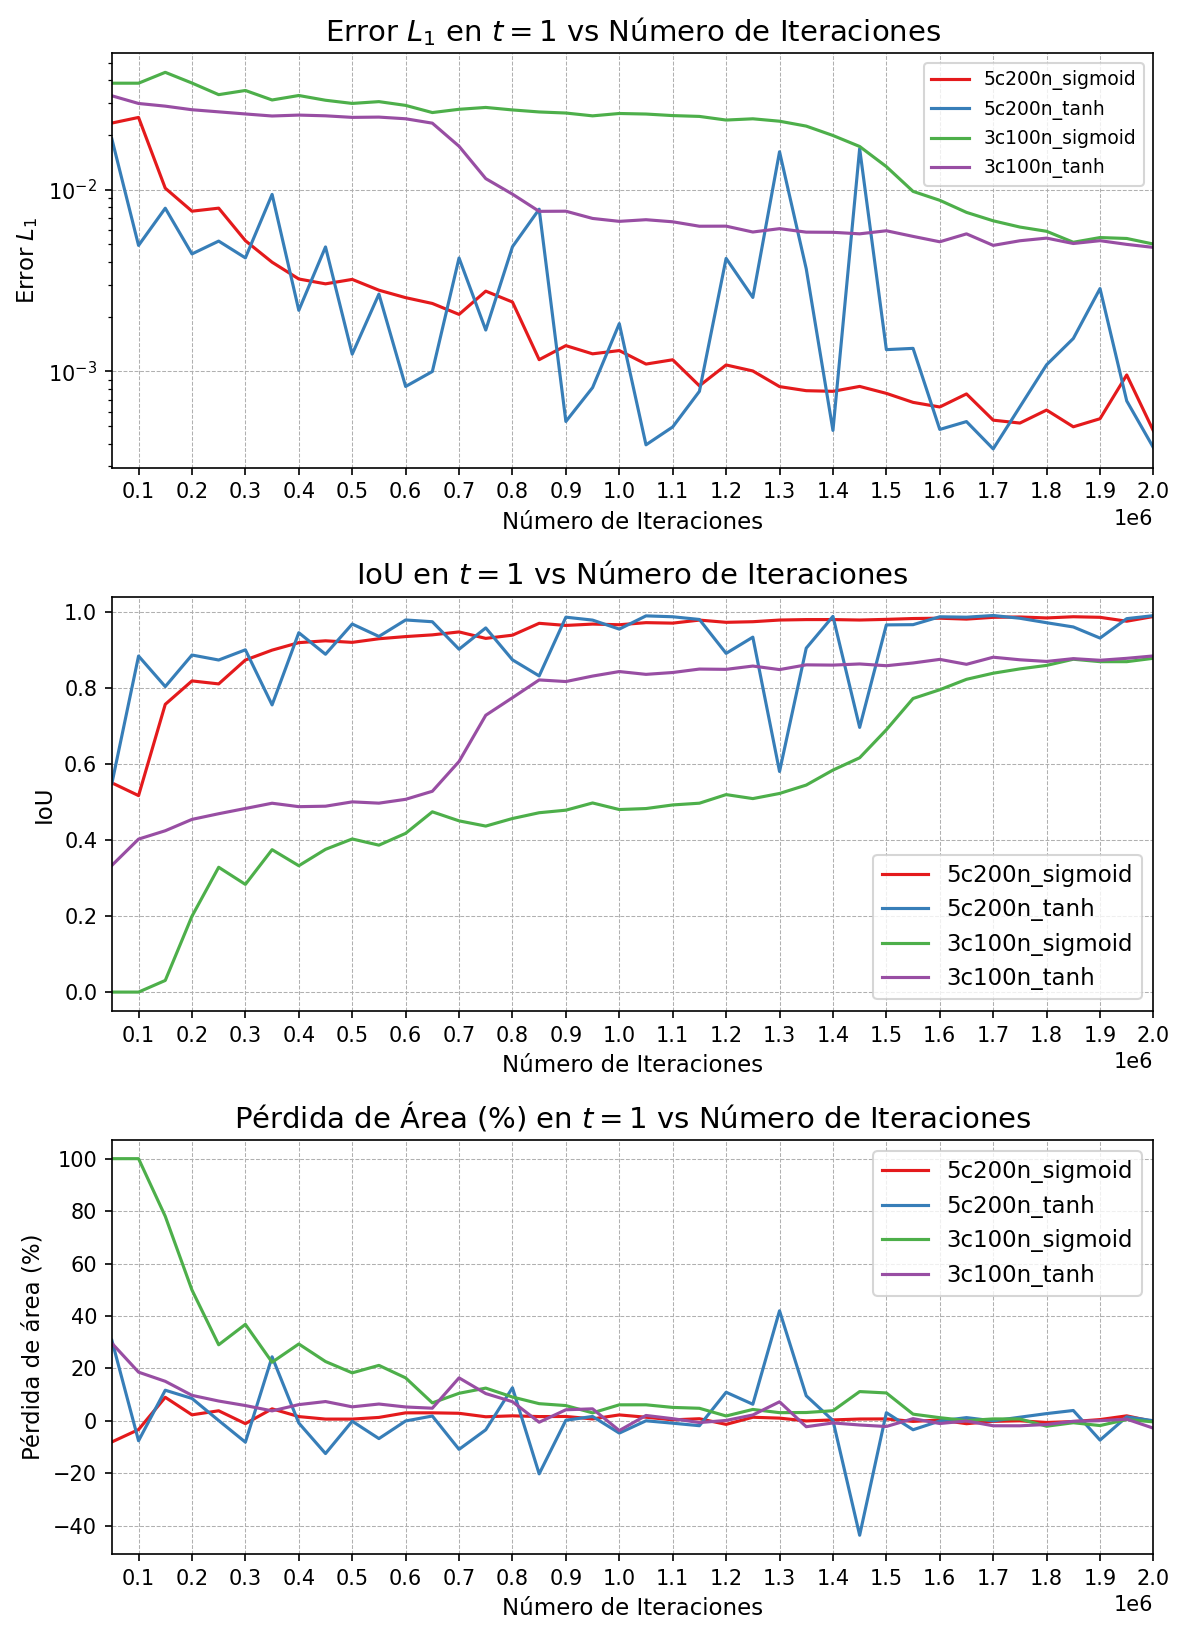

In [19]:
grafico1(datos=zalesak100)

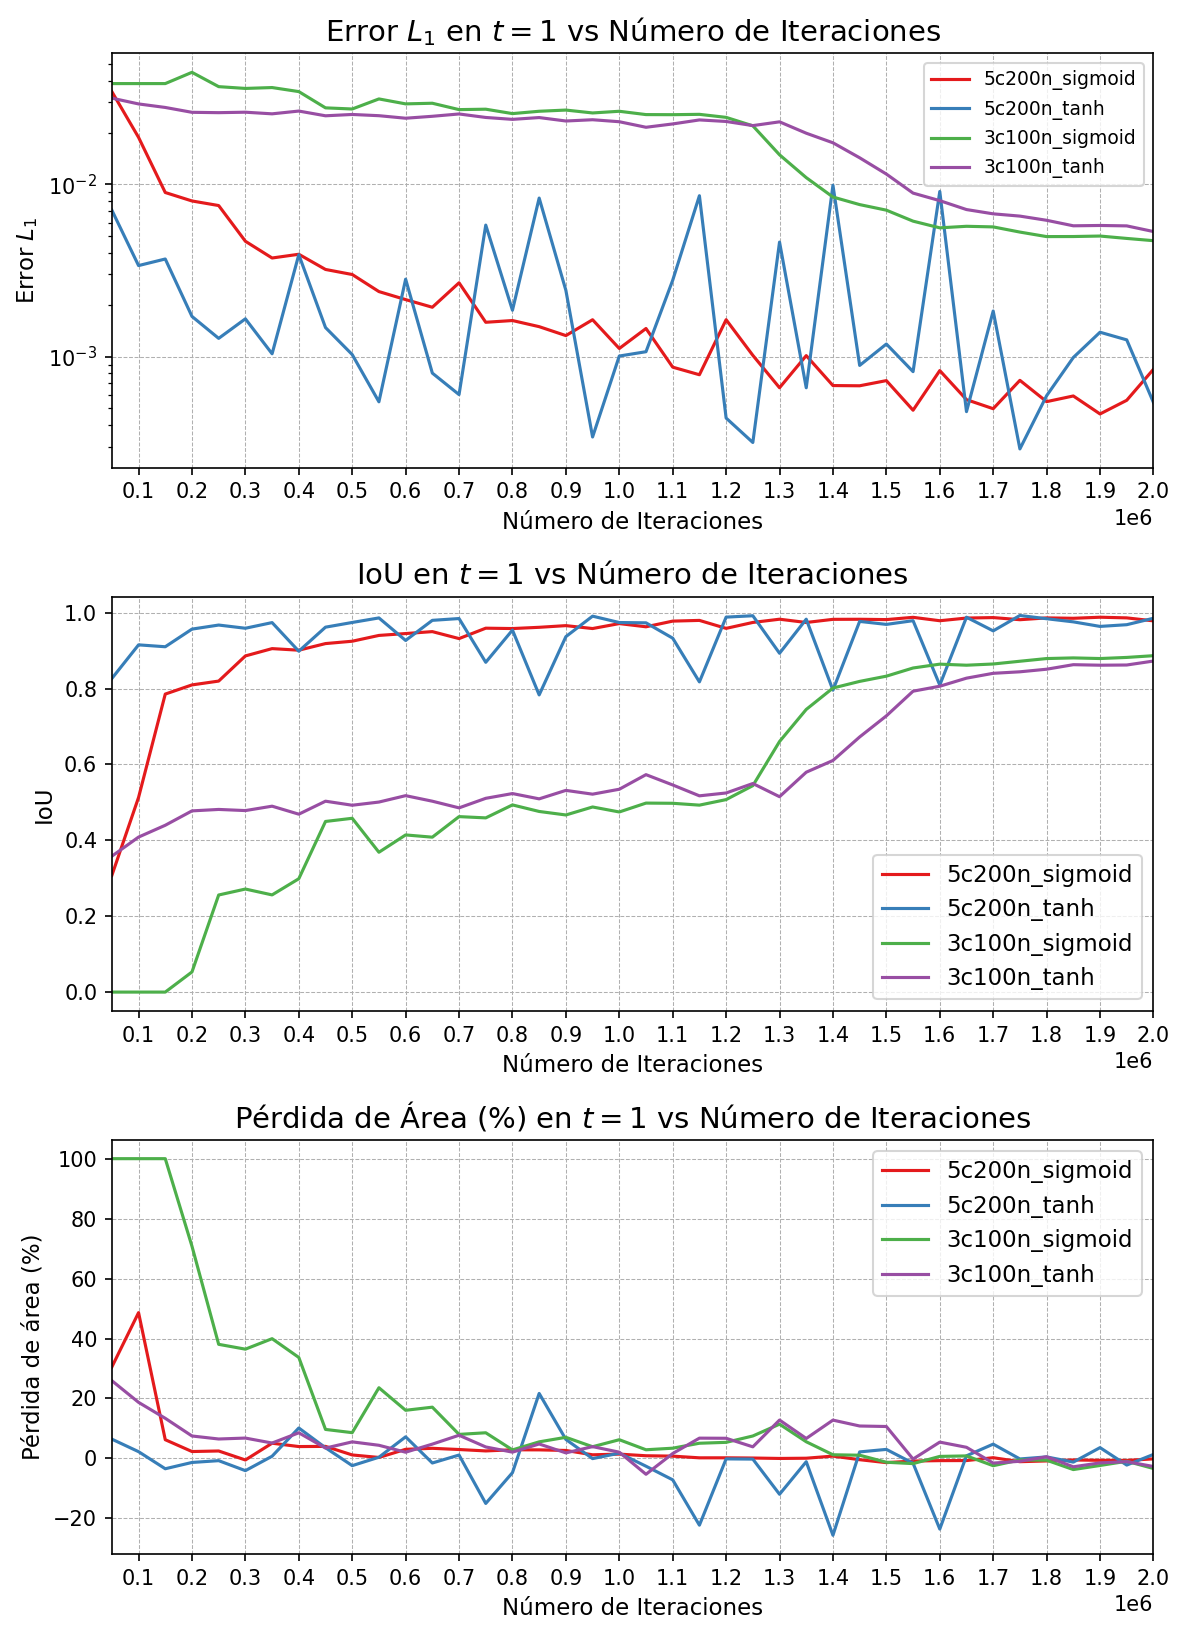

In [20]:
grafico1(datos=zalesak80)

**Vortex**

In [21]:
# Malla 100x100
# Vortex 5c200n sigmoid
v_100_5c_s = pd.read_csv('vortex/vortex_100x100_5c_200n_sigmoid/resultados.csv')
v_100_5c_s['Caso'] = '5c200n_sigmoid'
# Vortex 5c200n tanh
v_100_5c_t = pd.read_csv('vortex/vortex_100x100_5c_200n_tanh/resultados.csv')
v_100_5c_t['Caso'] = '5c200n_tanh'
# Vortex 3c100n sigmoid
v_100_3c_s = pd.read_csv('vortex/vortex_100x100_3c_100n_sigmoid/resultados.csv')
v_100_3c_s['Caso'] = '3c100n_sigmoid'
# Vortex 3c100n tanh
v_100_3c_t = pd.read_csv('vortex/vortex_100x100_3c_100n_tanh/resultados.csv')
v_100_3c_t['Caso'] = '3c100n_tanh'

# Concat
vortex100 = pd.concat([v_100_5c_s, v_100_5c_t, v_100_3c_s, v_100_3c_t], ignore_index=True)
vortex100['Malla'] = 100
vortex100

,num_iter,area,area_loss(%),error_L1,orden_L1,IoU,orden_IoU,tiempo_horas,tiempo_minutos,tiempo_segundos,Caso,Malla
0,50000,0.001086,98.464132,0.073849,0.000000,0.015357,0.000000,0,8,52.885024,5c200n_sigmoid,100
1,100000,0.024543,65.279099,0.048960,-0.592968,0.347145,4.498534,0,17,38.067741,5c200n_sigmoid,100
2,150000,0.043495,38.466949,0.028853,-1.304188,0.615269,1.411510,0,27,33.049843,5c200n_sigmoid,100
3,200000,0.050062,29.176845,0.022244,-0.904175,0.704172,0.469139,0,36,39.398275,5c200n_sigmoid,100
4,250000,0.063405,10.300824,0.014646,-1.872837,0.813289,0.645608,0,45,24.582720,5c200n_sigmoid,100
...,...,...,...,...,...,...,...,...,...,...,...,...
155,1800000,0.062476,11.615147,0.016424,0.653305,0.791702,-0.333331,3,10,42.737159,3c100n_tanh,100
156,1850000,0.066779,5.527377,0.015644,-1.775932,0.806211,0.662790,3,16,3.973206,3c100n_tanh,100
157,1900000,0.064823,8.294016,0.015714,0.166813,0.802899,-0.154329,3,21,27.797848,3c100n_tanh,100
158,1950000,0.064870,8.228402,0.015607,-0.263136,0.804180,0.061356,3,26,41.059556,3c100n_tanh,100


In [22]:
# Malla 80x80
# Vortex 5c200n sigmoid
v_80_5c_s = pd.read_csv('vortex/vortex_80x80_5c_200n_sigmoid/resultados.csv')
v_80_5c_s['Caso'] = '5c200n_sigmoid'
# Vortex 5c200n tanh
v_80_5c_t = pd.read_csv('vortex/vortex_80x80_5c_200n_tanh/resultados.csv')
v_80_5c_t['Caso'] = '5c200n_tanh'
# Vortex 3c100n sigmoid
v_80_3c_s = pd.read_csv('vortex/vortex_80x80_3c_100n_sigmoid/resultados.csv')
v_80_3c_s['Caso'] = '3c100n_sigmoid'
# Vortex 3c100n tanh
v_80_3c_t = pd.read_csv('vortex/vortex_80x80_3c_100n_tanh/resultados.csv')
v_80_3c_t['Caso'] = '3c100n_tanh'

# Concat
vortex80 = pd.concat([v_80_5c_s, v_80_5c_t, v_80_3c_s, v_80_3c_t], ignore_index=True)
vortex80['Malla'] = 80
vortex80

,num_iter,area,area_loss(%),error_L1,orden_L1,IoU,orden_IoU,tiempo_horas,tiempo_minutos,tiempo_segundos,Caso,Malla
0,50000,0.000000,100.000000,0.075001,0.000000,0.000000,0.000000,0,7,15.315042,5c200n_sigmoid,80
1,100000,0.018346,74.045865,0.055535,-0.433503,0.259486,inf,0,14,25.385879,5c200n_sigmoid,80
2,150000,0.041285,41.594070,0.031196,-1.422353,0.584101,2.001088,0,21,48.626296,5c200n_sigmoid,80
3,200000,0.054759,22.531593,0.018401,-1.834980,0.757037,0.901473,0,29,18.231540,5c200n_sigmoid,80
4,250000,0.059375,16.001992,0.014253,-1.144735,0.812777,0.318382,0,36,51.631838,5c200n_sigmoid,80
...,...,...,...,...,...,...,...,...,...,...,...,...
155,1800000,0.058889,16.689128,0.017877,-1.297177,0.769839,0.429015,3,1,29.939447,3c100n_tanh,80
156,1850000,0.060631,14.225068,0.017266,-1.268397,0.779491,0.454752,3,6,40.549639,3c100n_tanh,80
157,1900000,0.059352,16.034720,0.017815,1.173465,0.771238,-0.399092,3,11,53.301770,3c100n_tanh,80
158,1950000,0.066566,5.828225,0.016686,-2.521332,0.794350,1.136709,3,17,4.165337,3c100n_tanh,80


In [ ]:
# Mejor modelo para el vortex
mejor_modelo(pd.concat([vortex100, vortex80], ignore_index=True))

,num_iter,area,area_loss(%),error_L1,orden_L1,IoU,orden_IoU,tiempo_horas,tiempo_minutos,tiempo_segundos,Caso,Malla
L1 minimo,2000000,0.071003,-0.448991,0.00185,-7.191173,0.975693,0.191069,4,59,24.855197,5c200n_sigmoid,80
IoU maximo,2000000,0.071003,-0.448991,0.00185,-7.191173,0.975693,0.191069,4,59,24.855197,5c200n_sigmoid,80
abs(%p.a.) minimo,1250000,0.070685,0.001495,0.003427,-3.369767,0.955319,0.171561,3,6,40.328277,5c200n_sigmoid,80


In [ ]:
# Mejor modelo para el vortex - solo 100x100
mejor_modelo(vortex100)

,num_iter,area,area_loss(%),error_L1,orden_L1,IoU,orden_IoU,tiempo_horas,tiempo_minutos,tiempo_segundos,Caso,Malla
L1 minimo,1850000,0.07068,0.008261,0.001957,-0.842117,0.974208,0.023282,5,30,50.597995,5c200n_tanh,100
IoU maximo,1850000,0.07068,0.008261,0.001957,-0.842117,0.974208,0.023282,5,30,50.597995,5c200n_tanh,100
abs(%p.a.) minimo,1850000,0.07068,0.008261,0.001957,-0.842117,0.974208,0.023282,5,30,50.597995,5c200n_tanh,100


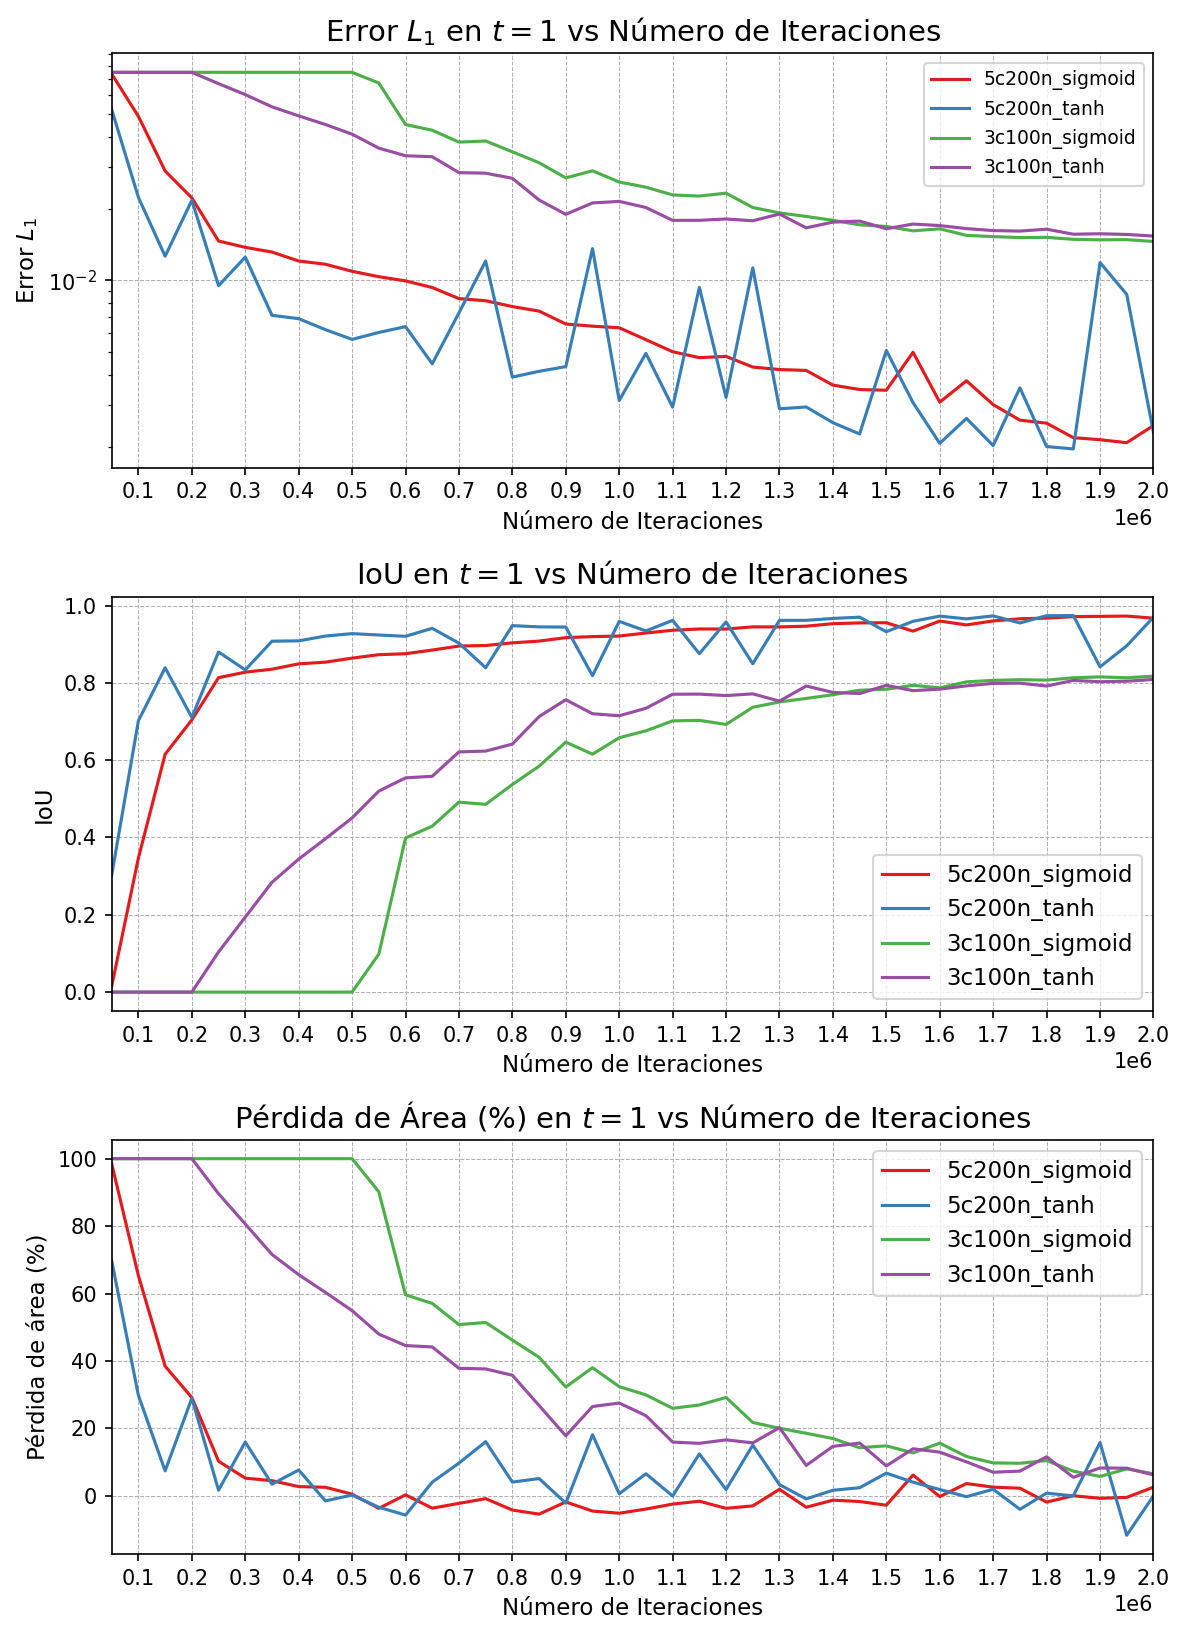

In [25]:
grafico1(datos=vortex100)

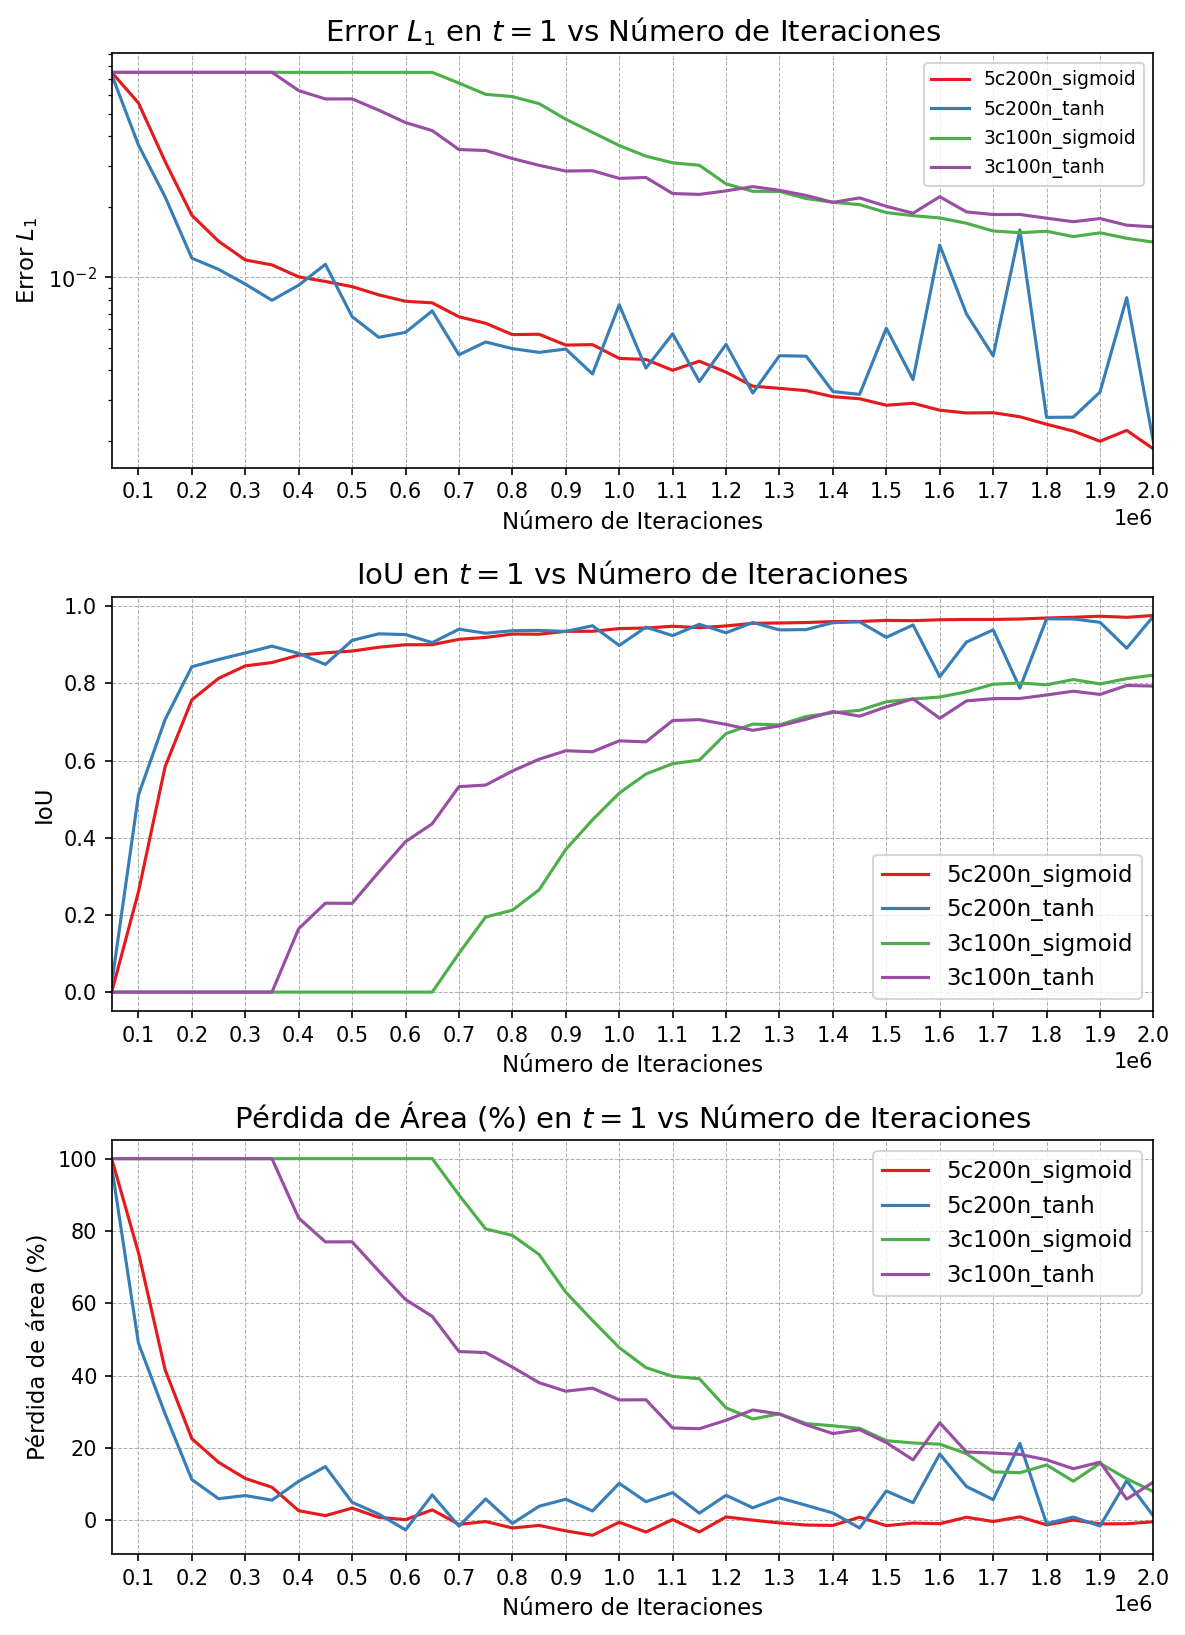

In [26]:
grafico1(vortex80)